# EXPLAINABILITY

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
data = pd.read_csv('cleaned_state_action_recopilation.csv',sep=',')

# Separate features and target
# Assuming the first 6 columns are actions
X = data.iloc[:, 6:]
y = data.iloc[:, :6]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train Decision Tree for multi-output regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Regression Report:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regression Report:
MSE: 0.026150798736976167


Feature Importances:
     feature  importance
5   State2.3    0.113158
14  State5.3    0.097637
13  State5.2    0.096389
12  State5.1    0.089973
17  State6.3    0.087598
4   State2.2    0.070455
16  State6.2    0.065282
8   State3.3    0.063604
3   State2.1    0.055801
11  State4.3    0.053406
10  State4.2    0.052828
6   State3.1    0.052062
9   State4.1    0.039873
15  State6.1    0.033966
7   State3.2    0.027967
1   State1.2    0.000000
2   State1.3    0.000000
0   State1.1    0.000000


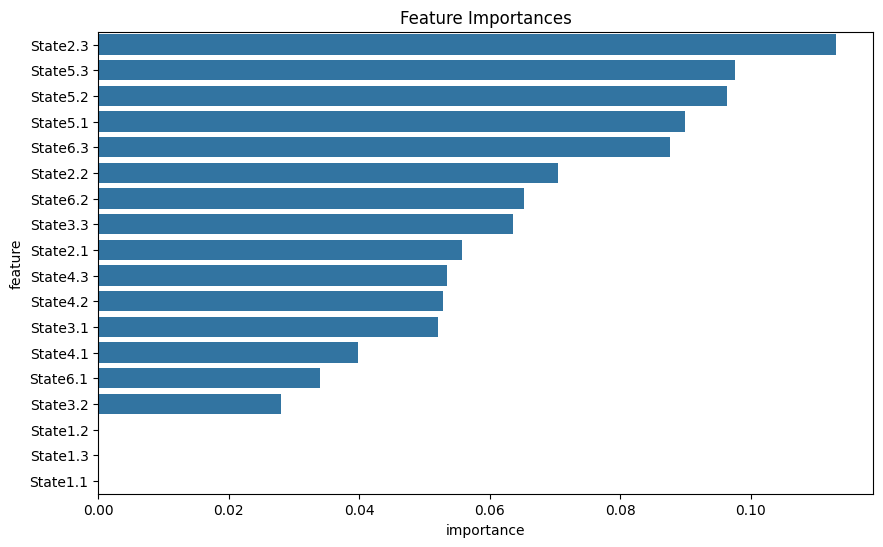

In [34]:

# Feature Importances
importances = dt_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


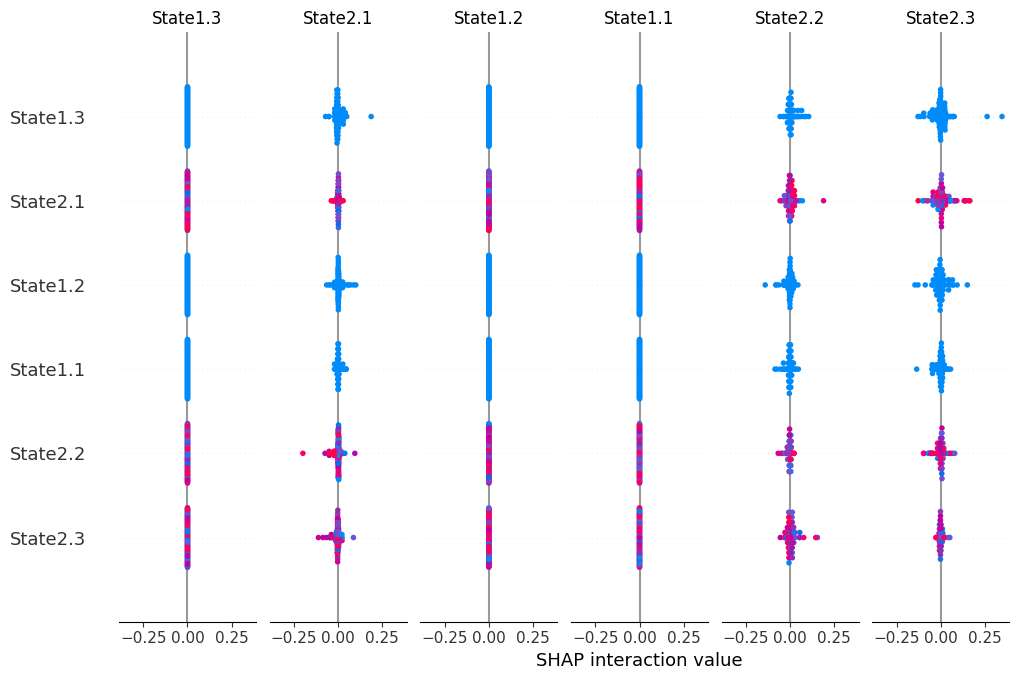

In [35]:

# SHAP for multi-output regression
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [36]:

# # Save the SHAP values
# shap_values_df = pd.DataFrame(shap_values, columns=X.columns)
# shap_values_df.to_csv('shap_values_dt.csv', index=False)

# # Save the feature importances
# feature_importances.to_csv('feature_importances_dt.csv', index=False)


In [37]:
# Train Random Forest for multi-output regression
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Regression Report:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regression Report:
MSE: 0.014814191819489281


Feature Importances:
     feature  importance
13  State5.2    0.082619
17  State6.3    0.075753
5   State2.3    0.075237
14  State5.3    0.073167
6   State3.1    0.071997
8   State3.3    0.070387
12  State5.1    0.068055
16  State6.2    0.067439
4   State2.2    0.063753
10  State4.2    0.061288
9   State4.1    0.060964
15  State6.1    0.059932
11  State4.3    0.057154
7   State3.2    0.056497
3   State2.1    0.055758
1   State1.2    0.000000
2   State1.3    0.000000
0   State1.1    0.000000


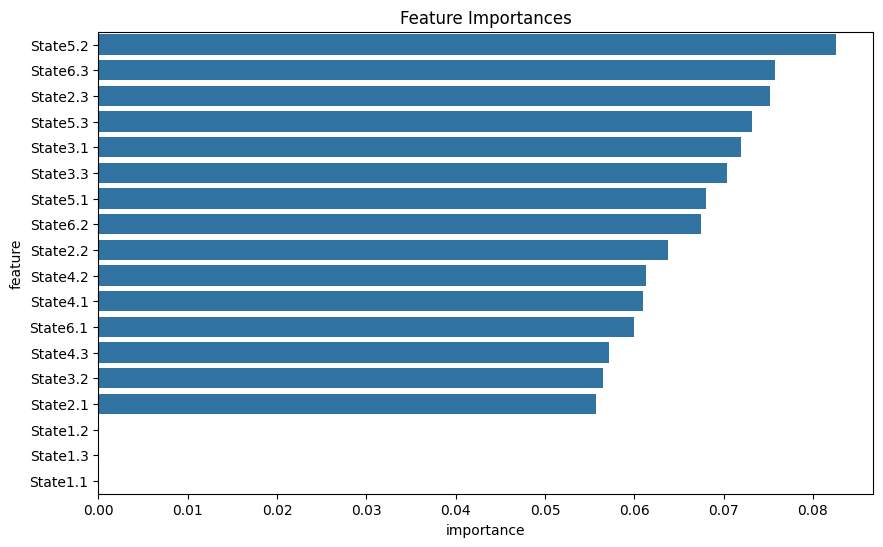

In [38]:

# Feature Importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()



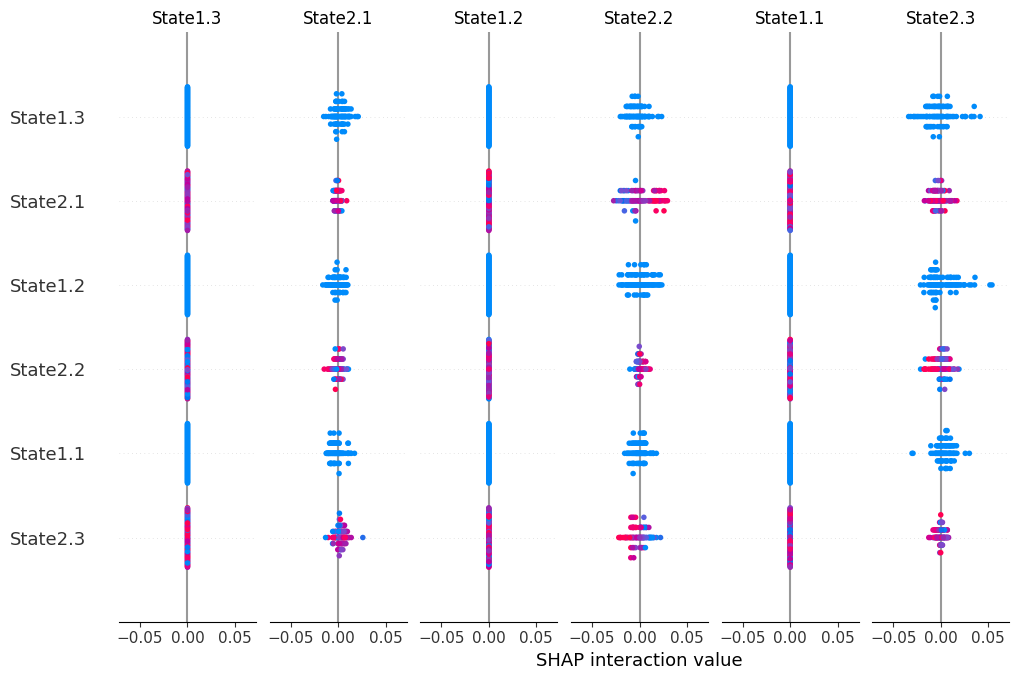

In [47]:

# SHAP for multi-output regression
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')



In [40]:

# Save the SHAP values
# shap_values_df = pd.DataFrame(shap_values, columns=X.columns)
# shap_values_df.to_csv('shap_values_rf.csv', index=False)

# # Save the feature importances
# feature_importances.to_csv('feature_importances_rf.csv', index=False)